### Content
- create Histogram order_hour_of_week
- Bar Chart loyalty_flag
- line chart
    - prices_hourly_trend
    - age_department_coun
- create scatterplot
    - scatt_age_meanOfSales
    - scatt_age_sales

In [2]:
# importing lybaries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import data sets

path = r'/Users/lennartzeidler/Desktop/Uni/Instacart Basket Analysis 08.10.2022 (4)'

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_prods_all.pkl'))

In [4]:
ords_prods_all.head()

,user_id,gender,state,age,date_joined,dependants_count,fam_status,income,order_id,order_number,...,product_name,department_id,prices,price_range,busiest_day,busiest_days,busiest_hours,loyalty_flag,avg_price_flag,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,New customer,Low spender,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Soda,7,9.0,Mid-range product,Regularly busy,Regulary busy days,Busiest hours,New customer,Low spender,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,New customer,Low spender,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,Regulary busy days,Busiest hours,New customer,Low spender,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,0% Greek Strained Yogurt,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,New customer,Low spender,Regular customer


### 3 Histogram (3)

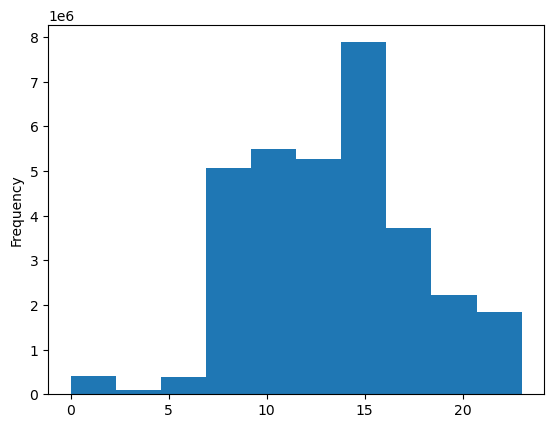

In [8]:
hist_order_hour_of_day = ords_prods_all['order_hour_of_day'].plot.hist()

In [9]:
# export histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

The histogram shows the amount of orders at different time points a day. To be specific, for each hour of the day.

### Bar Chart loyalty_flag (4)

In [19]:
test = ords_prods_all.drop_duplicates(subset=['order_id'])

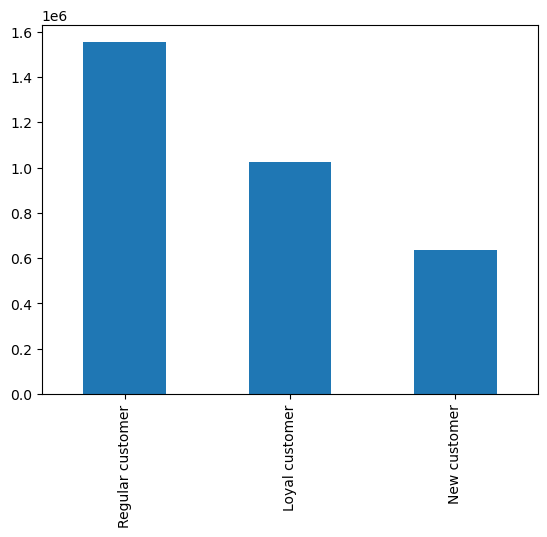

In [28]:
bar_loyalty_flag = test['loyalty_flag'].value_counts().plot.bar()

In [29]:
# export bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

Explanation: I used a subset, because the marketing team team wanted a graphic for orders and not for the product sales. Thats why I created the subset containing only one sale per order to create the graphic using this subset. 

### line chart (5)
##### create sample

In [30]:
# setting seed and create list of boolean
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [32]:
# splitting df into 70% ==> big and 30% ==> small
big = ords_prods_all[dev]
small = ords_prods_all[~dev]

In [33]:
# check length of df 
len(big) + len(small) == len(ords_prods_all)

True

In [35]:
price_hours_of_day = small[['order_hour_of_day','prices']]

### line chart (5)
##### create line chart

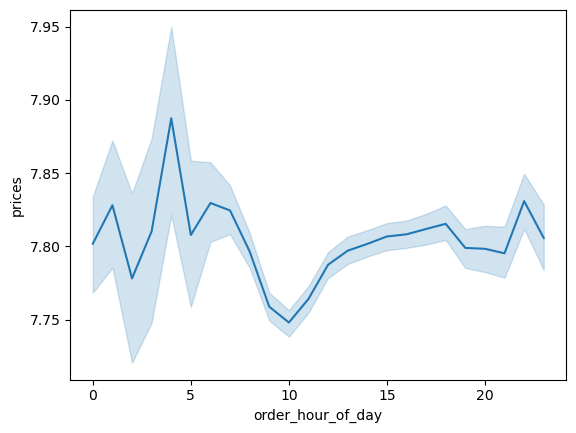

In [37]:
line = sns.lineplot(data = price_hours_of_day, x = 'order_hour_of_day',y = 'prices')

In [45]:
# export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hourly_trend.png'))

### line chart (6)
##### age and family

In [40]:
age_dependants_count = small[['age','dependants_count']]

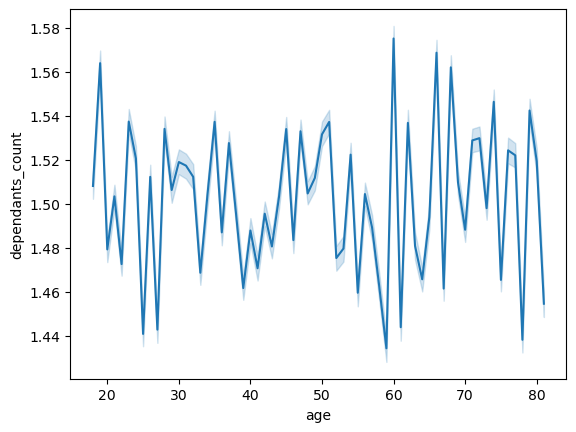

In [41]:
line_age_family = sns.lineplot(data = age_dependants_count, x = 'age',y = 'dependants_count')

Well this line chart tells us there are no age patterns, which seems kind of odd to me. Elder people should have more dependents than jung people in my opinion. Thats why I create another line diagramm with the big sample, even though it takes some time.

In [42]:
age_dependants_count_test = big[['age','dependants_count']]

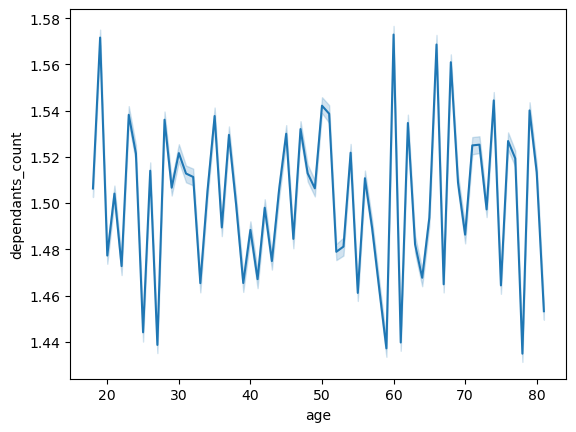

In [43]:
test = sns.lineplot(data = age_dependants_count_test, x = 'age',y = 'dependants_count')

Seems like our sample was precise. This means there is no pattern between age and the dependants_count

In [57]:
# export line chart
line_age_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_department_count.png'))

### scatterplot (7)

In [51]:
age_sales = ords_prods_all[['age','income']]

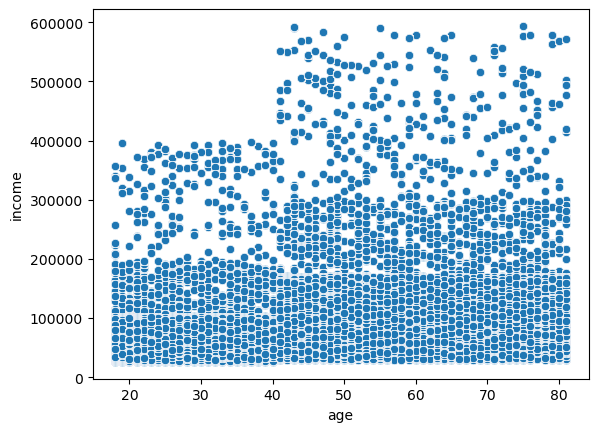

In [52]:
scatt_age_sales = sns.scatterplot(data = age_sales, x = 'age',y = 'income')

In [55]:
age_sales.groupby(['age']).mean()

,income
age,
18,70450.808845
19,69765.828287
20,70775.714989
21,70544.161396
22,69846.060211
...,...
77,116532.598008
78,117087.316962
79,115222.050475


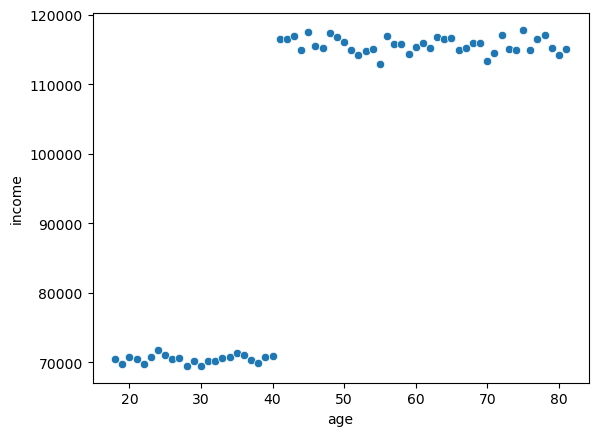

In [56]:
scatt_age_sales_2 = sns.scatterplot(data = age_sales.groupby(['age']).mean(), x = 'age',y = 'income')

I created two scatter plots.  Due to the large number of dots, the first one is a little unclear. Even yet, there was already a noticeable increase in income between the ages of 39 and 40. It is considerably more obvious in the second one.

In [58]:
# export line chart
scatt_age_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatt_age_sales.png'))
scatt_age_sales_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatt_age_meanOfSales.png'))